# Customer Churn Prediction

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from preprocessing import preprocess

In [3]:
df = pd.read_csv('data/telco.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# function for data exploration
def data_exploration(df):
    print("Data Types:")
    print(df.dtypes)
    print("Rows and Columns:")
    print(df.shape)
    print("Column Names:")
    print(df.columns)
    print("Null Values by Column:") 
    print(df.isnull().sum())
    print("Summary Stats:")
    print(df.describe())

In [5]:
data_exploration(df)

Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
Rows and Columns:
(7043, 21)
Column Names:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalChar

We don't need customerID column and we need to transform total_charges  into float

In [6]:
df.drop(['customerID'], axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Since there were empty strings before, we might have some null figures.

In [7]:
df['TotalCharges'].isnull().sum()

11

As the number of null values is very low we can drop them.

In [8]:
df = df.drop(df[df['TotalCharges'].isnull()].index)

In [9]:
print(df.dtypes)
df.isnull().sum()

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**17 Categorical features:**

- CustomerID: Customer ID unique for each customer
- gender: Whether the customer is a male or a female
- SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
- Partner: Whether the customer has a partner or not (Yes, No)
- Dependent: Whether the customer has dependents or not (Yes, No)
- PhoneService: Whether the customer has a phone service or not (Yes, No)
- MultipeLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
- DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract: The contract term of the customer (Month-to-month, One year, Two years)
- PaperlessBilling: The contract term of the customer (Month-to-month, One year, Two years)
- PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

**3 Numerical features:**

- Tenure: Number of months the customer has stayed with the company
- MonthlyCharges: The amount charged to the customer monthly
- TotalCharges: The total amount charged to the customer
**Prediction feature:**

Churn: Whether the customer churned or not (Yes or No)

In [10]:
# target variable 
print(df['Churn'].value_counts())
df['Churn'].value_counts()[1] / df['Churn'].value_counts().sum()

Churn
No     5163
Yes    1869
Name: count, dtype: int64


/var/folders/5d/_9n1crjd57xf1l0_1_ng0vq80000gn/T/ipykernel_82349/3732670878.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['Churn'].value_counts()[1] / df['Churn'].value_counts().sum()


0.26578498293515357

It is a binary classification problem with an unbalance target.

Text(0, 0.5, 'Number of Customers')

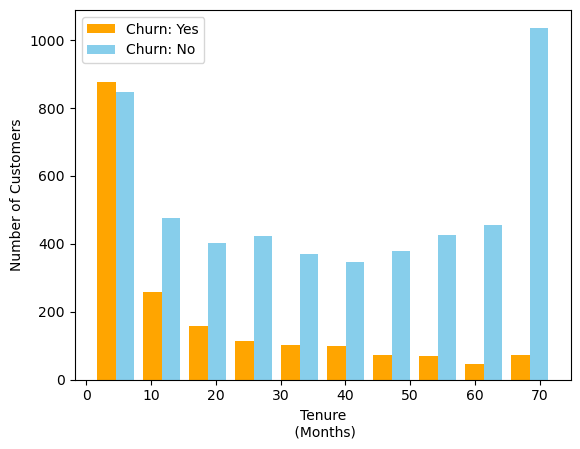

In [11]:
tenure_no = df[df['Churn'] == 'No']['tenure']
tenure_yes = df[df['Churn'] == 'Yes']['tenure']

plt.hist([tenure_yes, tenure_no], color=['orange', 'skyblue'], label=['Churn: Yes', 'Churn: No'])
plt.legend()
plt.xlabel('Tenure\n (Months)')
plt.ylabel('Number of Customers')


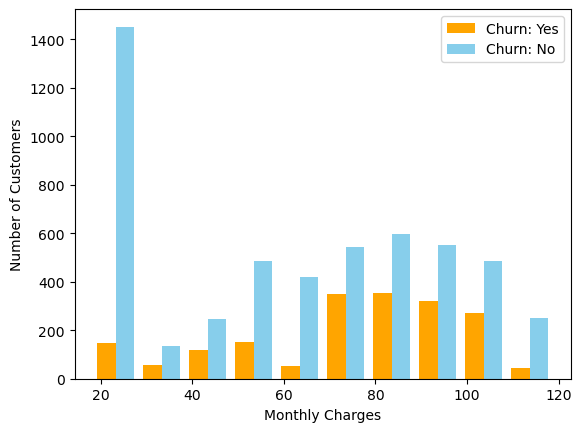

In [12]:
plt.hist([df[df['Churn'] == 'Yes']['MonthlyCharges'], df[df['Churn'] == 'No']['MonthlyCharges']], color=['orange', 'skyblue'], label=['Churn: Yes', 'Churn: No'])
plt.legend()
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.show()

-----

In [13]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

print_unique_col_values(df)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


Before label encoding we can coerce the columns have no internet service or no phone service which can be replaced by a no.

In [14]:
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

In [15]:
# Label-encoding binary columns
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)
    
    
df['gender'].replace({'Female':1,'Male':0},inplace=True)

/var/folders/5d/_9n1crjd57xf1l0_1_ng0vq80000gn/T/ipykernel_82349/50045690.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({'Yes': 1,'No': 0},inplace=True)
/var/folders/5d/_9n1crjd57xf1l0_1_ng0vq80000gn/T/ipykernel_82349/50045690.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
 

In [16]:
df = pd.get_dummies(data=df, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [17]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [18]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority') 
X_train_s,y_train_s=smote.fit_resample(X_train,y_train )
y_train_s.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

## Building XGB Model with Hypertuning

In [39]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.05, 0.1, 0.15],
    'min_child_weight': [1, 2, 3],
    'subsample':[0.7, 0.8, 1.0]}

model1 = XGBClassifier(random_state=42)
grid_search = GridSearchCV(model1, param_grid, cv=5, scoring='roc_auc',verbose=2)
grid_search.fit(X_train_s, y_train_s)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [3, 5, 10], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='roc_auc', verbose=2)

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
best_xgb_model = best_xgb_model = grid_search.best_estimator_
print(best_xgb_model)

y_pred_xgb = best_xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
Accuracy: 0.7562189054726368
AUC-ROC: 0.711165237017979
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1033
           1       0.54      0.61      0.57       374

    accuracy                  

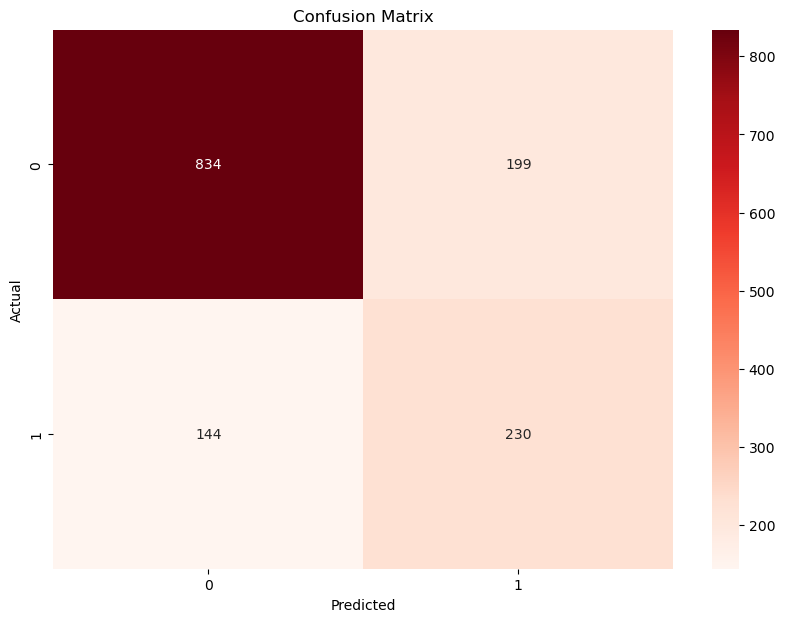

Roc-AUC Score: 0.71


In [88]:
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print('Roc-AUC Score:', round(roc_auc_score(y_test, y_pred_xgb), 2))

---

## Building Logistic Regression Model

In [44]:
# Import Machine learning algorithms and necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV
from scipy.stats import loguniform

def modeling(alg, alg_name, X_train, y_train, X_test, y_test, params={}):
    model = alg(**params)  # Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    def print_scores(alg_name, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ", acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ", pre_score)
        rec_score = recall_score(y_true, y_pred)
        print("recall: ", rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ", f_score)

    print_scores(alg_name, y_test, y_pred)
    return model, y_pred  # Return the model and predictions


# Define model
model = LogisticRegression()

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define search space
space = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': [None, 'l1', 'l2', 'elasticnet'],
    'C': loguniform(1e-5, 1000)
}

# Define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1, verbose=1)

# Execute search
result = search.fit(X_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
params = result.best_params_

# Run the model with best hyperparameters
log_model, y_pred_log = modeling(LogisticRegression, 'Logistic Regression Classification', X_train, y_train, X_test, y_test, params=params)


Fitting 30 folds for each of 500 candidates, totalling 15000 fits


/Users/busraalbayrak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/busraalbayrak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/busraalbayrak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/busraalbayrak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/busraalbayrak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/busraalbayrak/anaconda3/lib/

Best Score: 0.8057476786154498
Best Hyperparameters: {'C': 3.8411209946179334, 'penalty': 'l2', 'solver': 'newton-cg'}
Logistic Regression Classification
accuracy:  0.7882018479033405
precision:  0.6233766233766234
recall:  0.5133689839572193
f1_score:  0.7812318518249916


/Users/busraalbayrak/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
7080 fits failed out of a total of 15000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1590 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/busraalbayrak/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/busraalbayrak/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/bu

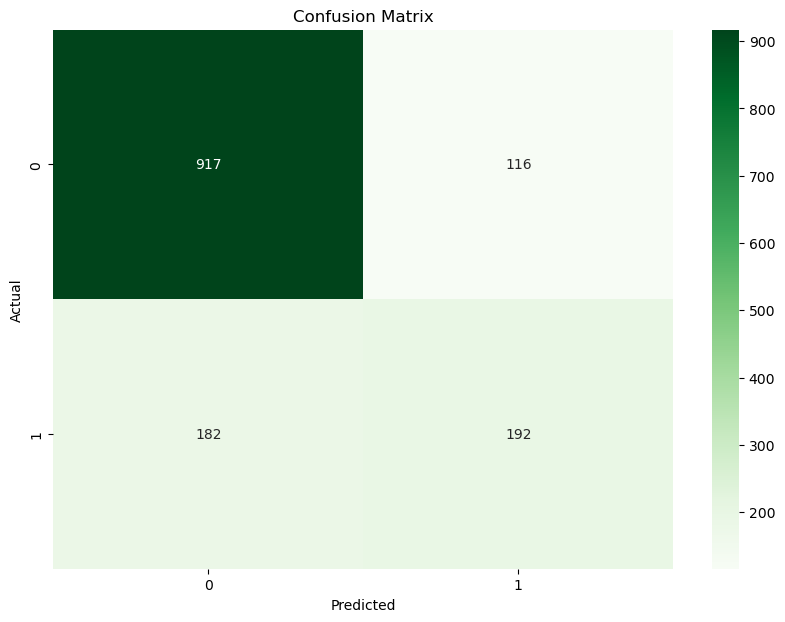

Accuracy: 0.79
Roc-AUC: 0.7


In [86]:
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print('Accuracy:', round(accuracy_score(y_test, y_pred_log), 2))
print('Roc-AUC:', round(roc_auc_score(y_test, y_pred_log), 2))

-------

Drop least predictive features

In [233]:
# drop gender, Partner,DeviceProtection from X_train and X_test
X_train.drop(['gender', 'Partner', 'DeviceProtection'], axis=1, inplace=True)
X_test.drop(['gender', 'Partner', 'DeviceProtection'], axis=1, inplace=True)


KeyError: "['gender', 'Partner', 'DeviceProtection'] not found in axis"

## Building ANN Model

In [412]:
from tensorflow import keras
from tensorflow.keras import regularizers

# Define the model architecture
model = keras.Sequential([
    # First Dense Layer with regularization
    keras.layers.Dense(128, input_shape=(23,), activation='relu', 
                       kernel_regularizer=regularizers.l2(0.017)),
    
    # Batch Normalization to stabilize learning
    keras.layers.BatchNormalization(),
    
    # Second Dense Layer with regularization
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.02)),
    
    # Dropout layer to reduce overfitting
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.02)),
    
    # Dropout layer to reduce overfitting
    keras.layers.Dropout(0.35),
    
    # Output layer for binary classification
    keras.layers.Dense(1, activation='sigmoid')
])

# EarlyStopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', 
                                               patience=10, 
                                               restore_best_weights=True)

# Learning rate scheduling
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0005, 
    decay_steps=100000, 
    decay_rate=0.96, 
    staircase=True
)

# Compile the model with Adam optimizer and binary cross-entropy loss
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr_schedule), 
              loss='binary_crossentropy', 
              metrics=['accuracy', 'precision'])

/Users/busraalbayrak/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [413]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=9)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after resampling
class_counts = pd.Series(y_train_resampled).value_counts()

class_weights = compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Train the model on the resampled data with class weights
model.fit(X_train_resampled, y_train_resampled, 
          epochs=200, 
          validation_split=0.2, 
          callbacks=[early_stopping], 
          class_weight=class_weight_dict)


Epoch 1/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6615 - loss: 3.4202 - precision: 0.5629 - val_accuracy: 0.6792 - val_loss: 2.3683 - val_precision: 1.0000
Epoch 2/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7575 - loss: 1.9240 - precision: 0.6875 - val_accuracy: 0.7173 - val_loss: 1.4613 - val_precision: 1.0000
Epoch 3/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7566 - loss: 1.1984 - precision: 0.6952 - val_accuracy: 0.7403 - val_loss: 1.0240 - val_precision: 1.0000
Epoch 4/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7742 - loss: 0.8338 - precision: 0.6910 - val_accuracy: 0.7700 - val_loss: 0.7380 - val_precision: 1.0000
Epoch 5/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7752 - loss: 0.6601 - precision: 0.6927 - val_accuracy: 0.7433 - val_loss: 0.6864 - val_precision: 1.0000
Epoch 6/200
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7766 - loss: 0.5852 - precision: 0.7236 - val_accuracy: 0.6731 - val

In [414]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7759 - loss: 0.6892 - precision: 0.5586


[0.6971270442008972, 0.7675906419754028, 0.550537645816803]

In [415]:
yp = model.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[[824 209]
 [118 256]]


Text(95.72222222222221, 0.5, 'Truth')

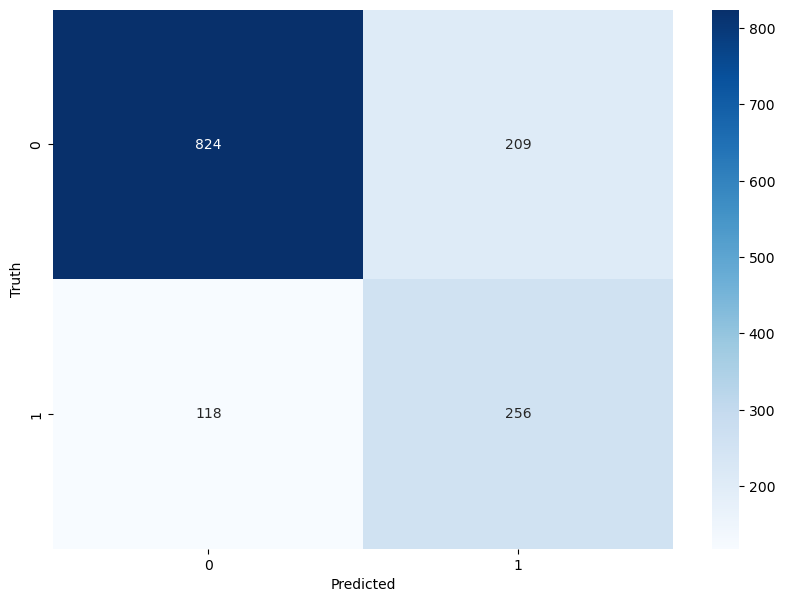

In [416]:
#confusion matrix score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [418]:
print('Roc-Auc Score:', roc_auc_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

Roc-Auc Score: 0.7410843242515699
Accuracy: 0.767590618336887


In [419]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1033
           1       0.55      0.68      0.61       374

    accuracy                           0.77      1407
   macro avg       0.71      0.74      0.72      1407
weighted avg       0.79      0.77      0.77      1407



The best performed and fastest model is ANN. 

In [30]:
model.save('models/ann_model.keras')

In [84]:
import joblib

# Save the Keras model using joblib
joblib.dump(model, 'models/ann_model.sav')


['models/ann_model.sav']

-----